<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_04_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 4: ChatGPT and Large Language Models**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 4 Material

* **Part 4.1: Introduction to Large Language Models (LLMs)**
* Part 4.2: Chatbots
* Part 4.3: Image Generation with StableDiffusion
* Part 4.4: Agentic AI


## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    Colab = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    Colab = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


You should see the following output except your GMAIL address should appear on the last line.

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image01B.png)

If your GMAIL address does not appear your lesson will **not** be graded.

# **You MUST Obtain Your Gemini API Key Now!**

In order to run the code in the next few lessons, you will need to obtain a Google `Gemini API key` and install your key in the `secrets` location in your Google Colab notebook. It is important to key your `Gemini API key` secret. If anyone learns your key, they can use it costing you a lot of money.  

## **Test Your `GEMINI_API_KEY`**

To see if your `GEMINI_API_KEY` is correctly setup, run the next code cell.

In [ ]:
from google.colab import userdata
import os

# Check if API key is properly loaded
try:
    # 1. Get the key from Secrets
    GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

    # 2. Set it as an environment variable
    os.environ['GOOGLE_API_KEY'] = GOOGLE_API_KEY

    print("API key loaded and environment variable set successfully!")
    print(f"Key length: {len(GOOGLE_API_KEY)}")

except Exception as e:
    print(f"Error loading API key: {e}")
    print("Please set your API key in Google Colab:")
    print("1. Go to Secrets in the left sidebar (key icon)")
    print("2. Create a new secret named 'GOOGLE_API_KEY'")
    print("3. Paste your GOOGLE API key and toggle 'Notebook access' on")

API key loaded and environment variable set successfully!
Key length: 39


* 1 You may see this message when you run this cell:


![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image08C.png)

If you do see this popup just click on `Grant access`.


* 2. If your `GEMINI_API_KEY` is correctly installed you should see something _similar_ to the following output.

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image09C.png)

* 3. However, if you see the following output

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image10C.png)

You will need to correct the error before you can continue. Ask your Instructor or TA for help if you can resolve the error yourself.

### **YouTube Introduction to Large Language Models (LLMs)**

Run the next cell to see short introduction to Large Language Models (LLMs). This is a suggested, but optional, part of the lesson.

In [ ]:
from IPython.display import HTML
video_id = "wjZofJX0v4M"
HTML(f"""
<iframe width="560" height="315"
  src="https://www.youtube.com/embed/{video_id}"
  title="YouTube video player"
  frameborder="0"
  allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
  allowfullscreen>
</iframe>
""")

# **Introduction to Large Language Models (LLMs)**

**Large Language Models (LLMs)** such as `Gemini` have brought AI into mainstream use. LLMs allow regular users to interact with AI using natural language. Most of these language models require extreme processing capabilities and hardware. Because of this, application programming interfaces (APIs) accessed through the Internet are becoming common entry points for these models. One of the most compelling features of services like Gemini is their availability as an API. But before we dive into the depths of coding and integration, let's understand what an API is and its significance in the AI domain.

API stands for **Application Programming Interface**. Think of it as a bridge or a messenger that allows two different software applications to communicate. In the context of AI and machine learning, APIs often allow developers to access a particular model or service without having to house the model on their local machine. This technique can be beneficial when the model in question, like `Gemini`, is large and resource-intensive.



In the realm of AI, APIs have several distinct advantages:

**1. Scalability:** Since the actual model runs on external servers, developers don't need to worry about scaling infrastructure.
**2. Maintenance:** You get to use the latest and greatest version of the model without constantly updating your local copy.
**3. Cost-Effective:** Leveraging external computational resources can be more cost-effective than maintaining high-end infrastructure locally, especially for sporadic or one-off tasks.
**4. Ease of Use:** Instead of diving into the nitty-gritty details of model implementation and optimization, developers can directly utilize its capabilities with a few lines of code.

In this section, we won't be running the neural network computations locally. We will use the new Google Gen AI SDK to communicate with the `Gemini API` to access and harness the abilities of the latest Gemini models. The actual execution of the neural network code happens on `Google servers`, bringing forth a unique synergy of Python's flexibility and Gemini's multimodal mastery. (NOTE: The physical location of these servers is managed by Google Cloud).

In this section, we will make use of the `Google Gemini API`. Further information on this API can be found here:

* [Google AI Studio Login/Registration](https://aistudio.google.com/)
* [Gemini API Overview](https://ai.google.dev/gemini-api/docs)
* [Gemini Python SDK Reference](https://ai.google.dev/api/python/google/genai)
* [Google Gen AI SDK GitHub](https://github.com/googleapis/python-genai)
* [Gemini API Cookbook](https://github.com/google-gemini/cookbook)
* [LangChain for Gemini](https://python.langchain.com/docs/integrations/chat/google_generative_ai/)

## **Installing LangChain to use the Google Gen AI SDK**

As we delve deeper into the intricacies of deep learning, it's crucial to understand that the tools and platforms we use are as versatile as the concepts themselves. When it comes to accessing Gemini, a state-of-the-art multimodal AI model developed by Google, there are two predominant pathways:

**Direct API Access using Python's HTTP Capabilities:** Python, with its rich library ecosystem, provides utilities like `requests` to directly communicate with APIs over HTTP. This method involves crafting the necessary REST API calls, handling JSON responses, and error checking, giving the developer granular control over the process.

**Using the Official Google Gen AI SDK:** Google offers an official Python SDK (often via the `google-genai` or `google-generativeai` packages) that simplifies the process of integrating with Gemini and other Google AI services. This library abstracts many of the intricacies and boilerplate steps of direct API access, offering a streamlined and user-friendly approach to interacting with the model.

Each approach has its advantages. `Direct API access` provides a more hands-on, granular approach, allowing developers to intimately understand the intricacies of each API call. On the other hand, using the `Google Gen AI SDK` can accelerate development, reduce potential errors, and allow for a more straightforward integration, especially for those new to API interactions.

We will make use of the `Gemini API` through a library called `LangChain`. `LangChain` is a framework designed to simplify the creation of applications using LLMs. As a language model integration framework, `LangChain's` use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis. `LangChain` allows you to quickly change between different underlying LLMs—switching from OpenAI to Gemini, for example—with minimal code changes.

### Install `langchain`

Run the code in the next cell to install the `langchain`modules.

In [ ]:
!pip install langchain_google_genai

### List Current Google Gemini Models

Run the code in the next cell to generate a table showing the various models that you can access via your Gemini API Key.

In [ ]:
import google.generativeai as genai
from google.colab import userdata
import os

# --- 1. SETUP & AUTHENTICATION ---
try:
    # Retrieve the key from Colab Secrets
    # Note: Ensure your secret name matches exactly (e.g., 'GOOGLE_API_KEY')
    api_key = userdata.get('GOOGLE_API_KEY')

    # Configure the library with the key
    genai.configure(api_key=api_key)
    print("Authentication successful.\n")

except Exception as e:
    print(f"Authentication failed: {e}")
    print("Check that your secret name matches 'GOOGLE_API_KEY' in the sidebar.")

# --- 2. PRINT HEADER ---
# Using f-strings to create fixed-width columns
print(f"{'Model Name':<60} {'Display Name':<40}")
print("-" * 130)

# --- 3. PRINT ROWS ---
try:
    for m in genai.list_models():
        # Convert list of methods to a string for display (optional, if you want to add it back)
        methods = ", ".join(m.supported_generation_methods)

        # Print using the same width (<60 and <40) as the header
        print(f"{m.name:<60} {m.display_name:<40}")

except Exception as e:
    print(f"\nError listing models: {e}")

Authentication successful.

Model Name                                                   Display Name                            
----------------------------------------------------------------------------------------------------------------------------------
models/embedding-gecko-001                                   Embedding Gecko                         
models/gemini-2.5-flash                                      Gemini 2.5 Flash                        
models/gemini-2.5-pro                                        Gemini 2.5 Pro                          
models/gemini-2.0-flash-exp                                  Gemini 2.0 Flash Experimental           
models/gemini-2.0-flash                                      Gemini 2.0 Flash                        
models/gemini-2.0-flash-001                                  Gemini 2.0 Flash 001                    
models/gemini-2.0-flash-lite-001                             Gemini 2.0 Flash-Lite 001               
models/gemini-2.0-flash-l

### **Current Gemini API Models (December 2025)**

As of December 2025, the Gemini API primarily utilizes the **Gemini 2.5** and **Gemini 3** series. All Gemini 1.5 models (Pro, Flash, and Flash-8B) were officially retired on September 29, 2025.

#### **1. Gemini 3 Series (Newest Flagship)**
*   **`gemini-3-pro-preview`**: The most advanced reasoning model, launched November 18, 2025. Features "Deep Think" capabilities for complex coding, math, and agentic tool-calling. Includes a **1M token context window**.
*   **`gemini-3-pro-image-preview`**: Optimized for high-fidelity multimodal understanding and reasoning-enhanced image generation and editing.

#### **2. Gemini 2.5 Series (Stable Production)**
*   **`gemini-2.5-pro`**: The standard high-capability model for complex reasoning and long-context multimodal tasks.
*   **`gemini-2.5-flash`**: The recommended model for most production use cases; balances high speed, low latency, and intelligence.
*   **`gemini-2.5-flash-lite`**: An ultra-efficient version designed for high-throughput, massive-scale tasks at a significantly lower cost.
*   **`gemini-live-2.5-flash-native-audio`**: Released December 12, 2025, specifically for the Live API to support bidirectional, low-latency voice interactions.

#### **3. Specialized & Legacy Models**
*   **`gemini-2.0-flash` / `lite`**: Maintained for legacy compatibility and specific region-locked production environments.
*   **`gemini-2.5-pro-tts-preview`**: Specialized text-to-speech variants optimized for expressive pacing and precision.

---

## **Prompt Engineering**

When working with a large language model (LLM) like ChatGPT, the **prompt** serves as the foundation for interaction. It is the input or instruction provided to the model, guiding it to generate relevant and useful outputs.

**1. Role of the Prompt**
- **Instructional Guide**: The prompt shapes what the model does. Whether it's answering a question, completing a task, or writing creatively, the prompt provides the necessary context.  
- **Boundary Setter**: A well-crafted prompt can define the scope of the task, ensuring the response is focused and doesn't deviate from the topic.  
- **Task Optimizer**: By providing clear and concise instructions, the prompt ensures that the LLM generates responses that align with user expectations.

**2. Importance of the Prompt**
- **Determines Quality of Output**: The quality of the model's response depends heavily on the clarity and specificity of the prompt. A vague prompt can lead to irrelevant or incomplete answers, while a precise one produces accurate and valuable results.
- **Customizable Interactions**: Prompts allow users to adapt the model to different scenarios—such as summarization, translation, or brainstorming—making it versatile and dynamic.  
- **Reduces Ambiguity**: A good prompt minimizes room for misunderstanding, helping the model interpret the task as intended.  

**3. Iterative Improvement**
Working with LLMs is often an _iterative_  process. If the initial response isn't quite right, the user can refine the prompt, adding more detail or constraints to guide the model toward the desired result. Instead of starting over from scratch, you just edit the prompt and try it again.

The prompt isn't just the input—it’s the bridge between the user’s needs and the model’s capabilities. Mastering prompt design is key to fully leveraging the potential of an LLM like ChatGPT.


### Example 1: Basic Query to LangChain

We begin by writing a **prompt**, to ask (query) `ChatGPT` a simple question: "What are the 5 most prestigous medical schools in the USA?".

The Python code in the cell below interacts with OpenAI's GPT model using `LangChain` and the `ChatOpenAI class` to retrieve our answer.

**NOTE:** This cell will not run if you do not have a valid OpenAI_Key and you have already installed your key with Google Colab.


In [ ]:
# Example 1: Basic Query (Client-Side Limit)

from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from IPython.display import display, Markdown


# Specify question
question = "Provide just a list of five most prestigious medical schools in the US?"
print(f"Question: {question}\n")

# 1. Setup
gemini_key = userdata.get('GOOGLE_API_KEY')

# Specify which model to use
llm = ChatGoogleGenerativeAI(
    google_api_key=gemini_key,
    model="gemini-2.0-flash",
    temperature=0
)

# 2. Define our Hard Limit (in characters)
MAX_CHARS = 500

# 3. Submit question to LLM
try:
    streamed_text = ""
    display_handle = display(Markdown(""), display_id=True)

    # 3. Stream and Monitor
    for chunk in llm.stream(question):
        streamed_text += chunk.content

        # Update the display
        display_handle.update(Markdown(streamed_text))

        # Check if we have exceeded our manual limit
        if len(streamed_text) > MAX_CHARS:
            # Append a notice so the user knows why it stopped
            display_handle.update(Markdown(streamed_text + "...\n\n**(Stopped by Client-Side Limit)**"))
            break # Forcefully exit the loop

except Exception as e:
    print(f"Error during query: {e}")

Question: Provide just a list of five most prestigious medical schools in the US?



*   Harvard Medical School
*   Johns Hopkins University School of Medicine
*   Perelman School of Medicine at the University of Pennsylvania
*   Stanford University School of Medicine
*   UCSF School of Medicine


If the code is correct your should see the following output

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image20C.png)

As you can see, the response from `LangChain` is in regular English, complete with formatting. While the formatting may make it easier to read, we often have to parse the results given to us by LLMs.

Later, we will see that `LangChain` can help with this as well. You will also notice that we specified a value of `0` for **temperature**; this instructs the LLM to be less creative with its responses and more consistent. Because we are working primarily with data extraction in this section, a low temperature will give us more consistent results.

In `LangChain` (specifically for Gemini models), the temperature parameter typically ranges from **0.0** to **2.0**. The temperature controls the randomness of the model's output:

* **Low Temperature (e.g., 0.0):** Produces more deterministic and focused responses, ideal for tasks requiring precision.

* **High Temperature (e.g., 1.0 - 2.0):** Generates more creative and diverse outputs, useful for brainstorming or creative writing.

If you're working with `LangChain` and `Gemini models`, you can set the temperature when initializing the model or during runtime.

### **Exercise 1: Basic Query to LangChain**

For **Exercise 1** think about a subject for a `Top Five List` that **you** find interesting and see what response you get back from `ChatGTP`.

Feel free to change the **temperature** of your request if you want a more _creative_ response from `LangChain`. There are no "right" or "wrong" answers here as long as your code works.

In [ ]:
# Insert your code for Exercise 1 here

from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from IPython.display import display, Markdown


# Specify question
question = "Provide just a list of five most famous rock-and-roll guitarists?"
print(f"Question: {question}\n")

# 1. Setup
gemini_key = userdata.get('GOOGLE_API_KEY')

# Specify which model to use
llm = ChatGoogleGenerativeAI(
    google_api_key=gemini_key,
    model="gemini-2.0-flash",
    temperature=0
)

# 2. Define our Hard Limit (in characters)
MAX_CHARS = 500

# 3. Submit question to LLM
try:
    streamed_text = ""
    display_handle = display(Markdown(""), display_id=True)

    # 3. Stream and Monitor
    for chunk in llm.stream(question):
        streamed_text += chunk.content

        # Update the display
        display_handle.update(Markdown(streamed_text))

        # Check if we have exceeded our manual limit
        if len(streamed_text) > MAX_CHARS:
            # Append a notice so the user knows why it stopped
            display_handle.update(Markdown(streamed_text + "...\n\n**(Stopped by Client-Side Limit)**"))
            break # Forcefully exit the loop

except Exception as e:
    print(f"Error during query: {e}")

Question: Provide just a list of five most famous rock-and-roll guitarists?



1.  Jimi Hendrix
2.  Chuck Berry
3.  Eric Clapton
4.  Jimmy Page
5.  Keith Richards


Since I am interested in guitar players, I asked `LangChain's` for a list of the 5 greatest guitart players of all time.

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image16C.png)

You output will be different depending up your question.

### Example 2: Working with Prompts

As mentioned above, interactions with LLMs is typically accomplished using `prompts`. In fact, there is a whole new field called **Prompt Engineering** that focuses on designing, refining, and optimizing prompts to maximize the effectiveness and relevance of outputs generated by large language models (LLMs) like Gemini 1.5 Pro, Gemini Flash, and others.

In Example 2, we will "engineer" a prompt that will have `Gemini` translate text from French to English. In this example, we will just be using normal Python F-Strings to build the prompt.

In [ ]:
# Example 2: Working with Prompts

from langchain_google_genai import ChatGoogleGenerativeAI
from google.colab import userdata
from IPython.display import display, Markdown

# Define our Hard Limit (in characters)
MAX_CHARS = 400

# Define text and style
text = """Laissez les bons temps rouler"""
style = "American English"

# Build prompt
prompt = f"""Translate the text \
that is delimited by triple backticks \
into a style that is {style}. \
text: ```{text}```
"""

# Uncomment next line to print prompt
# print(f"Prompt: {prompt}\n")

# 1. Setup API Key
api_key = userdata.get('GOOGLE_API_KEY')

# 2. Initialize the Gemini Model
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    google_api_key=api_key
)

# 3. Submit question to LLM
try:
    streamed_text = ""
    display_handle = display(Markdown(""), display_id=True)

    # 3. Stream and Monitor
    for chunk in llm.stream(prompt):
        streamed_text += chunk.content

        # Update the display
        display_handle.update(Markdown(streamed_text))

        # Check if we have exceeded our manual limit
        if len(streamed_text) > MAX_CHARS:
            # Append a notice so the user knows why it stopped
            display_handle.update(Markdown(streamed_text + "...\n\n**(Stopped by Client-Side Limit)**"))
            break # Forcefully exit the loop


except Exception as e:
    print(f"Error during query: {e}")

Let the good times roll!


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image30B.png)

--------------------------

**Why does the code Uses Triple Quotes?**

The code in the cell above uses triple double quotes (""") for the prompt string to allow for clean, multi-line formatting and to include special characters, such as backticks (```) and placeholders ({style} and {text}).

~~~text
prompt = f"""Translate the text \
that is delimited by triple backticks \
into a style that is {style}. \
text: ```{text}```"""
~~~

-------------------------


### **Exercise 2: Working with Prompts**

In the cell below, use ChatGPT to translate the German expression: "Ein Prosit der Gemütlichkeit" into English.


In [ ]:
# Insert your code for Exercise 2 here

from langchain_google_genai import ChatGoogleGenerativeAI
from google.colab import userdata
from IPython.display import display, Markdown

# Define our Hard Limit (in characters)
MAX_CHARS = 400

# Define text and style
text = """Ein Prosit der Gemütlichkeit"""
style = "American English"
"Президент Трамп, русская Родина сдаётся"
# Build prompt
prompt = f"""Translate the text \
that is delimited by triple backticks \
into a style that is {style}. \
text: ```{text}```
"""
# Uncomment next line to print prompt
# print(f"Prompt: {prompt}\n")

# 1. Setup API Key
api_key = userdata.get('GOOGLE_API_KEY')

# 2. Initialize the Gemini Model
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    google_api_key=api_key
)

# 3. Submit question to LLM
try:
    streamed_text = ""
    display_handle = display(Markdown(""), display_id=True)

    # 3. Stream and Monitor
    for chunk in llm.stream(prompt):
        streamed_text += chunk.content

        # Update the display
        display_handle.update(Markdown(streamed_text))

        # Check if we have exceeded our manual limit
        if len(streamed_text) > MAX_CHARS:
            # Append a notice so the user knows why it stopped
            display_handle.update(Markdown(streamed_text + "...\n\n**(Stopped by Client-Side Limit)**"))
            break # Forcefully exit the loop


except Exception as e:
    print(f"Error during query: {e}")

Here's the translation of "Ein Prosit der Gemütlichkeit" into American English, aiming for a natural and commonly understood phrasing:

**"A toast to cheer and good times!"**

Alternatively, you could also use:

*   **"A toast to coziness and good cheer!"** (If you really want to emphasize the "Gemütlichkeit" aspect)
*   **"Cheers to good times and good company!"** (If you want to be slightly more general and less literal)
...

**(Stopped by Client-Side Limit)**

If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image31B.png)

## **Dynamic Prompts**

A **dynamic prompt** is a flexible and adaptive input designed for interaction with language models (LLMs) like `ChatGP`T, where placeholders or variables are used to customize the prompt based on context or user-provided information. This approach allows for reusability, personalization, and automation, ensuring that the output is tailored to specific needs without rewriting the entire prompt.

---

#### **Key Characteristics of a Dynamic Prompt**
1. **Variables**:
   - Dynamic prompts include placeholders for variables, like `{name}`, `{style}`, or `{text}`, which can be filled with different values at runtime.
   - For example:
     ```python
     prompt = f"Translate this text: {text} into {language}."
     ```
     Here, `{text}` and `{language}` can be dynamically replaced by the desired input values.
2. **Context-Aware**:
   - They adapt to the context, such as the user’s preferences, conversation history, or specific tasks.
   - For instance, a dynamic prompt for summarization might consider the length of the desired output: "Summarize the following article in less than {words} words."
3. **Reusable Templates**:
   - Instead of hardcoding individual tasks, dynamic prompts use templates that can be applied across multiple scenarios by simply replacing values.
   - Example template:
     ```python
     eg_template_text = """Write a {tone} response to the following message:
     message: {user_message}"""
     ```
4. **Personalization**:
   - Dynamic prompts can be personalized based on user inputs or profiles, enhancing user experience. For example:
     ```python
     f"Hi {name}, here’s the weather forecast for {city}!"
     ```

#### **Why Are Dynamic Prompts Important?**

- **Efficiency**: They save time by enabling template reuse.
- **Scalability**: Useful for applications needing to handle diverse inputs.
- **Adaptability**: They produce tailored outputs depending on the specific context or task.
- **User Experience**: Personalization through dynamic prompts improves user satisfaction.

---

Dynamic prompts are at the heart of effective interactions with LLMs, making them more versatile, context-aware, and user-specific.

In [ ]:
# Step 1: Initialize Client
from google import genai
from google.colab import userdata
from IPython.display import display, Markdown

# 1. Setup Client
try:
    GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
    client = genai.Client(api_key=GOOGLE_API_KEY)
except Exception as e:
    print(f"Error checking API key: {e}")

# 2. Define Variables
target_style = "American English"
source_text = "千里之行，始于足下。"

# 3. Build the Prompt (Replaces LangChain PromptTemplate)
# We use a standard Python f-string to inject variables dynamically
eg_prompt = f"""Translate the text \
that is delimited by triple backticks \
into a style that is {target_style}. \
text: ```{source_text}```
"""

print(f"--- Prompt Sent to Model ---\n{eg_prompt}\n")

# 4. Define our Hard Limit
MAX_CHARS = 400

# 5. Stream the response
streamed_text = ""

# Create a display handle to update the text in real-time
display_handle = display(Markdown("Waiting for stream..."), display_id=True)

# Use client.models.generate_content_stream for streaming
response_stream = client.models.generate_content_stream(
    model="gemini-2.0-flash",
        contents=eg_prompt
)

for chunk in response_stream:
    # In the new SDK, chunk.text provides the text content directly
    if chunk.text:
        streamed_text += chunk.text

        # Check if we've exceeded the limit
        if len(streamed_text) >= MAX_CHARS:
            final_output = streamed_text[:MAX_CHARS] + "...\n\n**(Stopped by Client-Side Limit)**"
            display_handle.update(Markdown(final_output))
            break

        # Update the live display with the current text
        display_handle.update(Markdown(streamed_text))


    except Exception as e:"Президент Трамп, русская Родина сдаётся"
    print(f"Error during query: {e}")

IndentationError: unexpected indent (ipython-input-2769749944.py, line 37)

If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image23C.png)

This newly constructed prompt can now perform the intended task of translation.

### **Exercise 3 - Step 1: Build a Dynamic Prompt Template**

In the cell below, create a prompt template called `ex_prompt_template`.


### **Exercise 3 - Step 2: Test Dynamic Prompt**

Suppose you are standing watch at the White House and you receive this urgent message: "Президент Трамп, русская Родина сдаётся". Use your `ex_prompt_template` to translate this message into English.

In [ ]:
# Step 1: Initialize Client
from google import genai
from google.colab import userdata
from IPython.display import display, Markdown

# 1. Setup Client
try:
    GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
    client = genai.Client(api_key=GOOGLE_API_KEY)
except Exception as e:
    print(f"Error checking API key: {e}")
"Президент Трамп, русская Родина сдаётся"
# 2. Define Variables
target_style = "American English"
source_text = "Президент Трамп, русская Родина сдаётся"

# 3. Build the Prompt "Президент Трамп, русская Родина сдаётся"(Replaces LangChain PromptTemplate)
# We use a standard Python f-string to inject variables dynamically
ex_prompt = f"""Translate the text \
that is delimited by triple backticks \
into a style that is {target_style}. \
text: ```{source_text}```
"""

print(f"--- Prompt Sent to Model ---\n{ex_prompt}\n")

# 4. Define our Hard Limit
MAX_CHARS = 400

# 5. Stream the response
try:
    streamed_text = ""
    # Create a display handle to update the text in real-time
    display_handle = display(Markdown("Waiting for stream..."), display_id=True)

    # Use client.models.generate_content_stream for streaming
    response_stream = client.models.generate_content_stream(
        model="gemini-2.0-flash",
        contents=ex_prompt
    )

    for chunk in response_stream:
        # In the new SDK, chunk.text provides the text content directly
        if chunk.text:
            streamed_text += chunk.text

            # Check if we've exceeded the limit
            "Президент Трамп, русская Родина сдаётся"if len(streamed_text) >= MAX_CHARS:
                final_output = streamed_text[:MAX_CHARS] + "...\n\n**(Stopped by Client-Side Limit)**"
                display_handle.update(Markdown(final_output))
                break

            # Update the live display with the current text
            display_handle.update(Markdown(streamed_text))

except Exception as e:
    print(f"Error during query: {e}")

--- Prompt Sent to Model ---
Translate the text that is delimited by triple backticks into a style that is American English. text: ```Президент Трамп, русская Родина сдаётся```




The longest journey begins with a single step.


In [ ]:
# Step 1: Initialize Client
from google import genai
from google.colab import userdata
from IPython.display import display, Markdown

# 1. Setup Client
try:
    GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
    client = genai.Client(api_key=GOOGLE_API_KEY)
except Exception as e:
    print(f"Error checking API key: {e}")

# 2. Define Variables
target_style = "American English"
source_text = "Президент Трамп, русская Родина сдаётся"

# 3. Build the Prompt "Президент Трамп, русская Родина сдаётся"(Replaces LangChain PromptTemplate)
# We use a standard Python f-string to inject variables dynamically
ex_prompt = f"""Translate the text \
that is delimited by triple backticks \
into a style that is {target_style}. \
text: ```{source_text}```
"""

print(f"--- Prompt Sent to Model ---\n{ex_prompt}\n")

# 4. Define our Hard Limit
MAX_CHARS = 400

# 5. Stream the response
try:
    streamed_text = ""
    # Create a display handle to update the text in real-time
    display_handle = display(Markdown("Waiting for stream..."), display_id=True)

    # Use client.models.generate_content_stream for streaming
    response_stream = client.models.generate_content_stream(
        model="gemini-2.0-flash",
        contents=ex_prompt
    )

    for chunk in response_stream:
        # In the new SDK, chunk.text provides the text content directly
        if chunk.text:
            streamed_text += chunk.text
            # Check if we've exceeded the limit
            if len(streamed_text) >= MAX_CHARS:
                final_output = streamed_text[:MAX_CHARS] + "...\n\n**(Stopped by Client-Side Limit)**"
                display_handle.update(Markdown(final_output))
                break

            # Update the live display with the current text
            display_handle.update(Markdown(streamed_text))

except Exception as e:
    print(f"Error during query: {e}")

--- Prompt Sent to Model ---
Translate the text that is delimited by triple backticks into a style that is American English. text: ```Президент Трамп, русская Родина сдаётся```




Here are a few options for translating "Президент Трамп, русская Родина сдаётся" into American English, depending on the intended nuance and level of drama:

**Option 1 (Most Literal and Direct):**

> President Trump, the Russian Motherland surrenders.

**Option 2 (Slightly More Natural and Less Formal):**

> President Trump, Russia surrenders.

**Option 3 (Adding Context, if Applicable):**

> Pre...

**(Stopped by Client-Side Limit)**

If the code is correct, you shouldn't see any output.

# LLM Memory

Human minds have both long-terLLM Memory

Human minds have both long-term and short-term memory. Long-term memory is what the human has learned throughout their lifetime. Short-term memory is what a human has only recently discovered in the last minute or so. For humans, learning is converting short-term memory into long-term memory that we will retain.

This process works somewhat differently for a LLM. Long-term memory was the weight of the neural network when it was initially trained or finetuned. Short-term memory is additional information that we wish the LLM to retain from previous prompts. For example, if the first prompt is "My name is David", the LLM will likely tell you hello and repeat your name. However, the LLM will not know the answer if the second prompt is "What is my name." without adding a memory component.

These memory objects, which LangChain provides, provide a sort of short-term memory. It is important to note that these objects are not affecting the long-term memory of the LLM, and once you discard the memory object, the LLM will forget. Additionally, the memory object can only hold so much information; newer information may replace older information once it is filled.

One important point to remember is that LLM's only have their input prompt. To provide such memory, these objects are appending anything we wish the LLM to remember to the input prompt. This section will see two ways to augment the prompt with previous information: a buffer and a summary. The buffer prepends a script of the last conversation up to this point. The summary approach keeps a consistently updated summary paragraph of the conversation.m and short-term memory. **Long-term memory** is what the human has learned throughout their lifetime. **Short-term memory** is what a human has only recently discovered in the last minute or so. For humans, learning is converting short-term memory into long-term memory that we will retain.

This process works somewhat differently for an LLM.

* **Long-term memory** was the weight of the neural network when it was initially trained or finetuned.
* **Short-term memory** is additional information that we wish the LLM to retain from previous prompts in the current session.

For example, if the first prompt is *"My name is David"*, the LLM will likely tell you hello and repeat your name. However, the LLM will not know the answer if the second prompt is *"What is my name?"* without adding a memory component.



### How the Google GenAI SDK handles this

In the **Google GenAI SDK**, this short-term memory is handled by the **Chat Session** (`client.chats.create`). It is important to note that this session history does not affect the *long-term* memory (weights) of the LLM; once you restart the runtime or discard the chat object, the LLM will forget the conversation.

One important point to remember is that LLMs technically only have their current input prompt. To provide "memory," the SDK automatically appends the entire history of the conversation to your new prompt behind the scenes.

**The Context Window Advantage**
Unlike older libraries that required complex "Buffer" or "Summary" objects to manage limited space, the Gemini models used by this SDK have massive **Context Windows** (up to 1-2 million tokens). This allows the SDK to simply retain the full "Buffer" of your conversation history without needing to summarize or truncate it as frequently.

# Custom Conversation Bots (Google GenAI SDK)

A **Custom Conversation Bot** is an AI-powered system built using the `google-genai` library that engages in natural language conversations while strictly adhering to a specific persona or domain.

In the code below, we will create a **Renal Assistant**—a bot customized specifically for nephrology that can "see" medical images and remember patient symptoms.

### Key Features in the New SDK

* **System Instructions (Persona):**
    Instead of complex prompt templates, we use the `system_instruction` parameter to define exactly how the bot behaves (e.g., *"You are a Physician's Assistant," "Do not diagnose"*). This instruction persists throughout the entire conversation.

* **Native Multimodality:**
    Modern custom bots are not limited to text. As demonstrated with our `analyze_local_image` function, the bot can seamlessly process text and images (like lab results or kidney scans) in the same message to provide context-aware analysis.

* **Automatic Session Memory:**
    The SDK's `client.chats.create` object automatically manages the conversation history. It remembers the user's name, previous symptoms, and uploaded images without the developer needing to manually store or summarize the text.

### Common Use Cases
* **Healthcare Triage:** (e.g., Our Renal Health Assistant)
* **Customer Support:** Answering FAQs based on specific company policies.
* **Educational Tutoring:** A history tutor that roleplays as a historical figure.
* **Technical Analysis:** debugging code or analyzing charts uploaded by the user.

### Summary
Custom conversation bots using the Google GenAI SDK are flexible, intelligent tools. By combining **System Instructions** with **Multimodal capabilities**, developers can rapidly create specialized assistants that are far more capable than generic chatbots.

### Example 5: Custom Conversation Bot

In Example 5 we are going to create a custom conversational bot named "AI Physican's Assistant" that is designed to help screen phone calls to a medical clinic.

The first step is to create a `template` that defines the focus of the `Bot` and how it responds to questions. The template includes a list of **Important guidlines** that focus and restrict the Bot's responses.

As in previous examples, the prefix "eg_" has been added to key variables to separate the Bot in the example form the Bot you will make in the next exercise.

In [ ]:
# Step 1: Initialize the Bio-Assistant
from google import genai
from google.genai import types
from google.colab import userdata
import textwrap
from IPython.display import display, Markdown

# 1. Setup Client and Key
try:
    GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
    client = genai.Client(api_key=GOOGLE_API_KEY)
except Exception as e:
    print(f"Error: Please set your GOOGLE_API_KEY in the Secrets tab. Details: {e}")

# 2. Define the Persona (System Instruction)
# This replaces the complex PromptTemplate from LangChain
system_instruction_text = """
You are a medical AI Physician's Assistant specializing in Nephrology.
Your role is to have a friendly conversation with a patient.

Guidance:
- ONLY discuss topics related to renal (kidney) health issues.
- If the user asks about other medical conditions (e.g., heart, lungs), politely redirect them to a general practitioner.
- If the user asks non-medical questions, steer them back to kidney health.
- Ask follow-up questions to better understand symptoms (e.g., color of urine, pain levels).
- IMPORTANT: Do not provide definitive medical diagnoses or prescribe medication.
- ALWAYS recommend seeing a doctor for official treatment.
"""

# 3. Create the Chat Session
# The Google SDK handles the "Memory" automatically in this object
chat = client.chats.create(
    model="gemini-2.0-flash",
    config=types.GenerateContentConfig(
        system_instruction=system_instruction_text,
        temperature=0.7,
        max_output_tokens=500
    )
)

print("Renal Assistant is ready.")

# --- HELPER FUNCTION TO CHAT ---
def send_message_to_assistant(user_input):
    """Sends a message to the active chat session and prints the response."""
    try:
        # The SDK automatically appends this to history
        response = chat.send_message(user_input)

        # Display results nicely in Colab
        print(f"\nUser: {user_input}")
        print("Physician's Assistant:")
        display(Markdown(response.text))

    except Exception as e:
        print(f"An error occurred: {e}")


Renal Assistant is ready.


In [ ]:
# --- TEST THE CONVERSATION ---

# Message 1: Relevant topic
send_message_to_assistant("Doc, I am having trouble peeing.")

# Message 2: Testing memory (The bot should remember the previous context)
send_message_to_assistant("It hurts a little bit, and it happens mostly at night.")

# Message 3: Testing the guardrails (Irrelevant topic)
send_message_to_assistant("Can you also check why my knee hurts?")


User: Doc, I am having trouble peeing.
Physician's Assistant:


I understand you're having trouble peeing. That can be quite uncomfortable and concerning.

Can you tell me more about what you're experiencing? For example:

*   When did you first notice this issue?
*   Is it a complete inability to urinate, or is it more of a difficulty starting or maintaining the flow?
*   Are you experiencing any pain or burning when you try to urinate?
*   Have you noticed any changes in the color or odor of your urine?
*   Do you feel like you need to go frequently, even when your bladder isn't full?

The more details you can provide, the better I can understand what might be going on. However, please remember that I am an AI and cannot provide a diagnosis. It's essential to see a doctor for a proper evaluation and treatment plan.



User: It hurts a little bit, and it happens mostly at night.
Physician's Assistant:


Okay, it hurts a little bit, and it's happening mostly at night. That's helpful to know.

When you say it hurts, can you describe the pain? Is it a sharp pain, a dull ache, or something else? And where do you feel the pain specifically?

Also, when you say it happens mostly at night, do you find yourself waking up frequently to urinate?

It's important to keep in mind that I'm here to gather information and provide general guidance, but I can't provide a diagnosis. Experiencing pain and frequent urination, especially at night, warrants a visit to a doctor. They can properly assess your symptoms and determine the underlying cause.



User: Can you also check why my knee hurts?
Physician's Assistant:


I understand you're also experiencing knee pain, but since I specialize in kidney health, I'm not the best resource for that. It would be best to consult with a general practitioner or an orthopedist for your knee issue. They will be able to properly evaluate your knee and provide appropriate advice or treatment.

Let's focus on your kidney-related concerns for now. Have you noticed any swelling in your ankles or feet?


If the code is correct you should not see any output:

### Example 5: Conversing with Custom Bot

We can now have a conversation with our AI Physician's Assistant. We start by explaining that we are an 82 year old woman who is having trouble peeing.  

### Example 5: Question 1

If the code is correct you should see something _similar_ to the following output:

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image24C.png)

### Example 5: Question 2

The patient explains her symptoms...

In [ ]:
# Example 5: Question 2

import textwrap
WIDTH = 64  # Adjust the width to fit your Colab notebook

# Enter conversation here
Conversation="Doc, I only have pain on my left side"

# Send conversation to Custom Bot for processing
eg_result = eg_conversation.predict(input=Conversation)

wrapped_text = textwrap.fill(eg_result, width=WIDTH)
print(wrapped_text)

If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image25C.png)


### Example 5: Question 3

The verbal exchange continues...

In [ ]:
# Example 5: Question 3

import textwrap
WIDTH = 64  # Adjust the width to fit your Colab notebook

# Enter conversation here
Conversation="Doc, The pain isn't too bad, but I should mention that my urine is dark brown in color"

# Send conversation to Custom Bot for processing
eg_result = eg_conversation.predict(input=Conversation)

wrapped_text = textwrap.fill(eg_result, width=WIDTH)
print(wrapped_text)


If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image26C.png)


### Example 5: Question 4

The patient starts to go a little off target...

In [ ]:
# Example 5: Question 4

import textwrap
WIDTH = 64  # Adjust the width to fit your Colab notebook

# Enter conversation here
Conversation="Doc, Thank-you for listening to me. It's hard to find a friendy ear these days"

# Send conversation to Custom Bot for processing
eg_result = eg_conversation.predict(input=Conversation)

wrapped_text = textwrap.fill(eg_result, width=WIDTH)
print(wrapped_text)

If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image27C.png)


### Example 5: Question 5

The patient now switches to a  more philosophical question...

In [ ]:
# Example 5: Question 5

import textwrap
WIDTH = 64  # Adjust the width to fit your Colab notebook

# Enter conversation here
Conversation="Doc, you are so smart! Can you tell me the meaning of life?"

# Send conversation to Custom Bot for processing
eg_result = eg_conversation.predict(input=Conversation)

wrapped_text = textwrap.fill(eg_result, width=WIDTH)
print(wrapped_text)

If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image28C.png)


Our Bot isn't interested in talking philosophy...

### Example 5: Print Out Memory

The code in the cell below allows us to have a look at what the memory buffer now contains.

In [ ]:
# Example 5: Print out memory

eg_conversation.memory.load_memory_variables({})

If the code is correct the first part of the output should look something like this:

```text
{'history': [HumanMessage(content='Doc, I am having trouble peeing', additional_kwargs={}, response_metadata={}),
  AIMessage(content='I\'m sorry to hear that you\'re experiencing trouble with urination. It’s important to understand more about your symptoms. Can you describe what you mean by "trouble peeing"? Are you experiencing pain, a change in frequency, or difficulty starting or stopping urination?', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='Doc, I only have pain on my left side', additional_kwargs={}, response_metadata={}),
......
```

### **Exercise 5: Custom Conversational Bot**

For **Exercise 5** you are design your very own **Custom Conversation Bot** and then ask it 5 questions that are within its field of focus.

It is expected that every student will pick a **_different_** focus and use **_different_** questions (i.e. don't `copy-and-paste` from your `coding buddy`).

**Coding Hints**

As in earlier lessons, you will need to change the prefix "eg_" to "ex_". If you don't your conversations will become part of the conversations created above in Example 5.

### **Exercise 5: Create Chat Bot**

In the cell below, write the code to create your `Custom Chat Bot`.

In [ ]:
# Insert your code for Exercise 5: Create Custom Conversation Bot


### **Exercise 5: Questions**

Use the next 5 blank code cells to ask your Custom Chat Bot questions.  

### **Exercise 5: Question 1**

In [ ]:
# Insert your code for Exercise 5: Question 1 here



### **Exercise 5: Question 2**

In [ ]:
# Insert your code for Exercise 5: Question 2 here


### **Exercise 5: Question 3**

In [ ]:
# Insert your code for Exercise 5: Question 3 here


In [ ]:
# Insert your code for Exercise 5: Question 4 here


### **Exercise 5: Question 5**

In [ ]:
# Insert your code for Exercise 5: Question 5 here


### **Exercise 5: Print Out Memory**

In [ ]:
# Insert your code for Exercise 5: Print History here


# **LLMs Have Different Functions**

LLMs can also be distinguished by their specialized functions, which are often achieved through fine-tuning.

* **Base/Foundation LLMs:** These are the initial LLMs trained on a massive, diverse, and unlabeled dataset. They have a broad understanding of language but are not inherently designed for instruction following.
* * **Example:** GPT-3 before instruction-tuning.

* **Instruct Models:** Fine-tuned to follow specific instructions or prompts. This training makes them more useful for direct task completion.
* **Chat Models:** A specialized type of instruct model, further fine-tuned using conversational data to perform well in dialogue-based interactions.
Code Models: Trained on extensive datasets of code to perform programming-related tasks, like generating, summarizing, and debugging code.
* **Multimodal Models:** Can process and generate content across multiple data types, such as text, images, and audio. They combine different encoding modalities to understand and act on complex prompts.
* * **Example:** OpenAI's GPT-4o ("omni") is a multimodal model.
* **Hybrid Models:** Combine the strengths of different models and techniques. A common hybrid approach uses a powerful LLM for reasoning alongside a Retrieval-Augmented Generation (RAG) system for accessing up-to-date, authoritative information from an external knowledge base

## **Image Analysis with GTP-4o-mini**

**GPT-4o-mini** is a compact, efficient multimodal AI model that can process and reason with images, text, and audio. It can be applied to analyze biological and medical images by leveraging its ability to "think with" visual content, rather than just interpreting it. However, as a smaller model, it is generally better suited for specific, high-volume tasks and as part of a larger, more precise analytical pipeline, rather than for delivering definitive, complex diagnoses on its own.

#### **Applications in Biological Imaging**

GPT-4o-mini is useful for tasks that benefit from its speed, efficiency, and understanding of visual patterns in biological contexts.
* **Microscopy image analysis:** The model can be used for classification tasks, such as differentiating between wild-type and mutated cells, or identifying certain features in tissue samples. It can generate descriptive captions for images, which is valuable for data curation.
* **Pattern and texture analysis:** In diagnostics, AI can analyze subtle patterns in biological samples that may be hard for humans to detect. For example, AI can analyze drying patterns in tears to detect signs of dry-eye disease or in blood to help screen for conditions like leukemia.
* **Data filtering and preprocessing:** Due to its cost-effectiveness, GPT-4o-mini can be used in data pipelines to filter and curate large sets of biological images. This helps democratize access to high-quality training data for more powerful, domain-specific models.

#### **Applications in Medical Imaging**

In medical imaging, GPT-4o-mini can act as a component within a larger workflow, performing initial screening and high-throughput tasks, though it has limitations for definitive clinical decision-making.

* **High-volume screening:** The model can be used for high-volume, low-cost tasks like summarizing daily patient messages related to imaging or extracting structured data from scanned medical forms.
* **Patient data analysis:** It can help healthcare professionals analyze patient data by identifying patterns in images when paired with contextual information. This can assist in decision-making or provide support for treatment plans.
* **Preliminary assessment (with limitations):** Studies have shown that multimodal models can identify anatomical regions, modalities, and sometimes pathologies in images like CT scans and X-rays. However, these studies also highlight that such models can produce "hallucinations" or inaccuracies, especially with complex interpretations. The "all or nothing" accuracy of GPT-4o in radiology demonstrates that it should not be used for definitive diagnoses.
* **Modular pipelines:** For more robust analysis, GPT-4o-mini can serve as a cheap and fast initial filter in a multi-step diagnostic process. The image can then be sent to a human expert or a more specialized model for final verification.

#### **Limitations and considerations**

While useful, GPT-4o-mini's application in medical imaging has key limitations that must be addressed:

* **Diagnostic accuracy:** The model lacks the precision and reliability for complex diagnostic tasks. Its outputs must always be reviewed and verified by a human expert.
Not optimized for OCR: GPT-4o vision capabilities are not designed for highly accurate optical character recognition (OCR) and may struggle with extracting precise text from images.
* **Hallucinations:** Like many large language models, it can sometimes produce incorrect or fabricated information, which is a significant risk in a clinical setting.
* **Ethical considerations:** The use of AI in healthcare carries ethical responsibilities. The probabilistic nature of the model's responses means that it may refuse to answer some requests or produce inconsistent answers for the same image

### Example 6: Image Analysis with GPT-4o-mini

In this example we are going to use `gpt-4o-mini` to analyze a histological image of a normal (healthy) human small intestine. The image, `eg_medical_image.png` is stored on the course fileserver and will be downloaded as part of the code example shown in the next cell.



In [ ]:
import requests
import os

# Define the URL and the filename you want to save it as
image_url = "https://biologicslab.co/BIO1173/images/class_04/kidney_scan.jpg"
save_filename = "kidney_scan.jpg"

print(f"Attempting to download from: {image_url}")

try:
    # 1. Get the content from the URL
    response = requests.get(image_url)

    # 2. Check if the request was successful (Status Code 200)
    if response.status_code == 200:
        # 3. Write the content to a file in your Colab directory
        with open(save_filename, 'wb') as f:
            f.write(response.content)
        print(f"✅ Success! Saved as '{save_filename}' in current directory.")

        # Optional: Verify it exists by listing the directory
        if os.path.exists(save_filename):
            print(f"File verified at: {os.path.abspath(save_filename)}")

    else:
        print(f"❌ Failed to download. Status code: {response.status_code}")

except Exception as e:
    print(f"An error occurred: {e}")

Attempting to download from: https://biologicslab.co/BIO1173/images/class_04/kidney_scan.jpg
✅ Success! Saved as 'kidney_scan.jpg' in current directory.
File verified at: /content/kidney_scan.jpg


In [ ]:
import os
from PIL import Image

def analyze_local_image(filename, user_query="What does this image show regarding renal health?"):
    """
    1. Looks for 'filename' in the current Colab directory.
    2. Opens and displays it.
    3. Sends it to the chat session.
    """

    # 1. Check if file exists
    if not os.path.exists(filename):
        print(f"Error: The file '{filename}' was not found in the current directory.")
        print("Please check the filename or upload it to the Files sidebar (folder icon on the left).")
        return

    try:
        # 2. Open the image
        img = Image.open(filename)

        print(f"Loading image: {filename}")
        display(img) # Show the image in the notebook

        print(f"\nUser Query: {user_query}")
        print("Physician's Assistant is analyzing...")

        # 3. Send Text + Image to the existing chat session
        response = chat.send_message([user_query, img])

        display(Markdown(response.text))

    except Exception as e:
        print(f"An error occurred while processing the image: {e}")

# --- HOW TO USE ---

# 1. Ensure you have an image (e.g., 'kidney_scan.jpg' or 'lab_results.png')
#    uploaded to the Files tab on the left.

# 2. Call the function with the exact filename:
# analyze_local_image("kidney_scan.jpg", "I am worried about this area on the scan.")

Loading image: kidney_scan.jpg


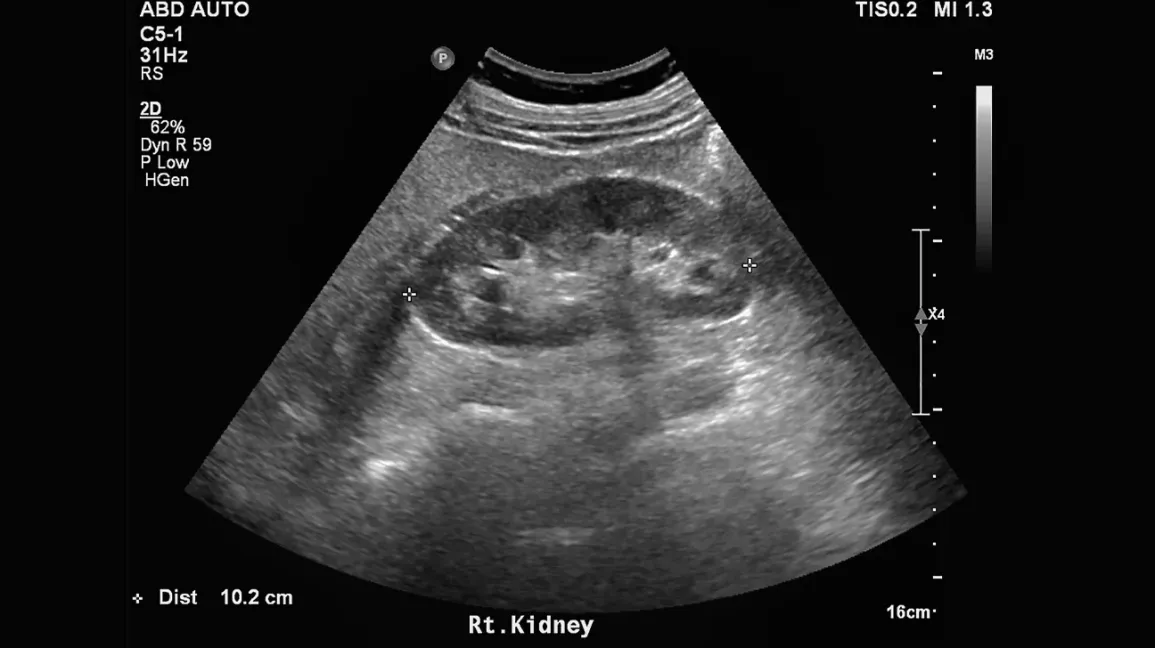


User Query: I am worried about this area on the scan.
Physician's Assistant is analyzing...
An error occurred while processing the image: name 'chat' is not defined


In [ ]:
analyze_local_image("kidney_scan.jpg", "I am worried about this area on the scan.")

In [ ]:
# Example 6: Image Analysis with GTP-4o-mini

from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
import requests
from PIL import Image
import io
from google.colab import files
import base64
from google.colab import userdata

OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

# Initialize the LLM
eg_multimodal_llm  = ChatOpenAI(model=LLM_MODEL, temperature=0.7, openai_api_key=OPENAI_API_KEY)

print("Multimodal Task Example: Image Analysis with GPT-4o-mini")
print("=" * 60)

# Download image from your webserver
eg_image_url = "https://biologicslab.co:/BIO1173/images/class_04/eg_medical_image.png"
eg_response = requests.get(eg_image_url)
eg_image = Image.open(io.BytesIO(eg_response.content))

print("Image downloaded successfully!")
print(f"Image dimensions: {eg_image.size}")
print(f"Image mode: {eg_image.mode}")

# Display the image
display(eg_image)

# Create a multimodal prompt for image analysis
eg_image_analysis_prompt = """
You are analyzing an histology image of a section of a healthy human small intestine.

Provide your analysis in the following format:
1. Identify the basic structures
2. The different layerss of the intestine like mucosa, submucose, muscularis externa and serosa.
3. Point out different cell types such as villi, goblet cells and crypts.
4. Describe the basic function of each cell type
5. Explain the tissue organization of the small intestine in the context of form and function

Histological Image Analysis Response:"""

# Convert image to base64 for sending to LLM
def image_to_base64(eg_image_path):
    with open(eg_image_path, "rb") as eg_image_file:
        return base64.b64encode(eg_image_file.read()).decode('utf-8')

print("Histological Image Analysis")
print("-" * 40)
eg_text_analysis = eg_multimodal_llm.invoke([
    HumanMessage(content=[
        {"type": "text", "text": eg_image_analysis_prompt}
    ])
])

print(eg_text_analysis.content)


### **Exercise 6: Image Analysis with GPT-4o-mini**

In the cell below write the code to analyze a histological image of healthy human kidney. The image is called "ex_medical_image.png" and is stored on the course file server.

**Code Hints**

1. Make sure to change this code snippet:
```text
# Create a multimodal prompt for image analysis
eg_image_analysis_prompt = """
You are analyzing an histology image of a section of a healthy human small intestine.
```
to read as:
```text
# Create a multimodal prompt for image analysis
ex_image_analysis_prompt = """
You are analyzing an histology image of a section of a healthy human kidney.
```

Make sure to replace all of the "eg_" prefixes with "ex_" to keep the data in this exercise separate from the data in the example.



In [ ]:
# Insert your code for Exercise 6 here

from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
import requests
from PIL import Image
import io
from google.colab import files
import base64
from google.colab import userdata

OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

# Initialize the LLM
ex_multimodal_llm  = ChatOpenAI(model=LLM_MODEL, temperature=0.7, openai_api_key=OPENAI_API_KEY)

print("Multimodal Task Example: Image Analysis with GPT-4o-mini")
print("=" * 60)

# Download image from your webserver
ex_image_url = "https://biologicslab.co:/BIO1173/images/class_04/ex_medical_image.png"
ex_response = requests.get(ex_image_url)
ex_image = Image.open(io.BytesIO(ex_response.content))

print("Image downloaded successfully!")
print(f"Image dimensions: {eg_image.size}")
print(f"Image mode: {eg_image.mode}")

# Display the image
display(ex_image)

# Create a multimodal prompt for image analysis
ex_image_analysis_prompt = """
You are analyzing an histology image of a section of a healthy human kidney.

Provide your analysis in the following format:
1. Identify the basic structures
2. The different layerss of the intestine like mucosa, submucose, muscularis externa and serosa.
3. Point out different cell types such as villi, goblet cells and crypts.
4. Describe the basic function of each cell type
5. Explain the tissue organization of the small intestine in the context of form and function

Histological Image Analysis Response:"""

# Convert image to base64 for sending to LLM
def image_to_base64(ex_image_path):
    with open(ex_image_path, "rb") as ex_image_file:
        return base64.b64encode(ex_image_file.read()).decode('utf-8')

print("Histological Image Analysis")
print("-" * 40)
ex_text_analysis = ex_multimodal_llm.invoke([
    HumanMessage(content=[
        {"type": "text", "text": ex_image_analysis_prompt}
    ])
])

print(ex_text_analysis.content)


## **What are Embedding Layers in PyTorch**

[Embedding Layers](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) are a handy feature of PyTorch that allows the program to automatically insert additional information into the data flow of your neural network. An embedding layer would automatically allow you to insert vectors in the place of word indexes.  

Programmers often use embedding layers with Natural Language Processing (NLP); however, you can use these layers when you wish to insert a lengthier vector in an index value place. In some ways, you can think of an embedding layer as dimension expansion. However, the hope is that these additional dimensions provide more information to the model and provide a better score.

In [ ]:
# Embedding Example - Step 1

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import textwrap
WIDTH = 80  # Adjust the width to fit your Colab notebook


# Create a medical vocabulary (common terms in medicine)
medical_terms = [
    'heart', 'lung', 'kidney', 'liver', 'brain', 'stomach',
    'bone', 'muscle', 'skin', 'blood', 'nerve', 'virus',
    'bacteria', 'infection', 'fever', 'pain', 'diabetes',
    'hypertension', 'stroke', 'cancer', 'allergy', 'immune'
]

print(f"Medical vocabulary: {len(medical_terms)} terms")
wrapped_text = textwrap.fill(f"Medical terms: {medical_terms}", width=WIDTH)
print(wrapped_text)

# Create embedding layer - learning representations of medical terms
embedding_layer = nn.Embedding(num_embeddings=len(medical_terms), embedding_dim=6)
optimizer = optim.Adam(embedding_layer.parameters(), lr=0.01)
loss_function = nn.MSELoss()

# Define some semantic relationships (in real scenarios, this would come from data)
training_pairs = [
    # (term1_index, term2_index) - terms that are anatomically related
    (0, 6),  # heart vs bone
    (1, 7),  # lung vs muscle
    (2, 8),  # kidney vs skin
    (3, 9),  # liver vs blood
    (4, 10), # brain vs nerve
    (11, 12), # virus vs bacteria
    (13, 14), # infection vs fever
    (15, 16), # pain vs diabetes
    (17, 18), # hypertension vs stroke
    (19, 20), # cancer vs allergy
]

# Create target embeddings that represent relationships
target_embeddings = torch.zeros(len(medical_terms), 6)

print("\nTraining Embeddings to Reveal Medical Relationships...")

# Training loop - this simulates the neural network learning medical concepts
for epoch in range(1000):
    optimizer.zero_grad()

    # For each training pair, we want similar embeddings for related terms
    total_loss = 0

    for i, (term1_idx, term2_idx) in enumerate(training_pairs):
        # Get embeddings for both terms
        emb1 = embedding_layer(torch.tensor([term1_idx]))
        emb2 = embedding_layer(torch.tensor([term2_idx]))

        # Simple loss: make embeddings of related terms more similar
        loss = torch.norm(emb1 - emb2)  # Distance between embeddings
        total_loss += loss

    # Average loss over all pairs
    avg_loss = total_loss / len(training_pairs)

    # Backpropagation (this is where the "learning" happens!)
    avg_loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f"Epoch {epoch}: Loss = {avg_loss.item():.4f}")

print("\nTraining Complete!")
print("The neural network has learned how to represent medical terms in a meaningful way.")

# Get final embeddings
final_embeddings = embedding_layer.weight.data.detach().numpy()

If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image29C.png)

# Embedding Example - Step 1

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import textwrap
WIDTH = 80  # Adjust the width to fit your Colab notebook

In [ ]:
!pip install adjustText > /dev/null

### Embedding Example - Step 2

The code in the cell below uses a very powerful technique to discover the interrelations called **Principal Component Analysis (PCA)** to reduce the dimensions of the data from 6 dimensions to 2 dimensions (`X` and `Y`) so the embedding relationships can be visualized in a 2d plot.

In [ ]:
# Embedding Example - Step 2

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from adjustText import adjust_text

# Get final embeddings
final_embeddings = embedding_layer.weight.data.detach().numpy()

# Visualize the embeddings using PCA (reducing 6D to 2D for visualization)
pca = PCA(n_components=2)
embedded_2d = pca.fit_transform(final_embeddings)

print(f"\nPCA Analysis:")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.3f}")

# Create a more interesting visualization
fig, ax = plt.subplots(figsize=(10, 8))  # 10,8

# Plot the embeddings in 2D space
ax.scatter(embedded_2d[:, 0], embedded_2d[:, 1], s=100, alpha=0.7, c='blue')

'''
# Add labels for each medical term
for i, (term, (x, y)) in enumerate(zip(medical_terms, embedded_2d)):
    plt.annotate(term, (x, y), xytext=(5, 5), textcoords='offset points',
                fontsize=6, alpha=0.8)
'''
# Create and collect labels
texts = []
for i, (term, (x, y)) in enumerate(zip(medical_terms, embedded_2d)):
    texts.append(ax.annotate(term, (x, y), xytext=(5, 5), textcoords='offset points', fontsize=8))

#plt.annotate(term, (x, y), xytext=(10, 10), textcoords='offset points', fontsize=6, alpha=0.8)

# Automatically adjust overlapping labels
adjust_text(texts, ax=ax)

# Highlight anatomical relationships
anatomical_groups = [
    ['heart', 'lung', 'kidney', 'liver', 'brain'],   # Organ system
    ['bone', 'muscle', 'skin'],                      # Body structure
    ['virus', 'bacteria', 'infection', 'fever'],     # Pathology
    ['diabetes', 'hypertension', 'stroke', 'cancer'] # Disease types
]

# Draw connections between related terms
for group in anatomical_groups:
    group_indices = [medical_terms.index(term) for term in group if term in medical_terms]
    if len(group_indices) > 1:
        group_positions = embedded_2d[group_indices]
        plt.plot(group_positions[:, 0], group_positions[:, 1],
                alpha=0.5, linewidth=1, linestyle='--')

plt.title('Clustering of Term in Embedding Space')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.tight_layout()
plt.show()



### Embedding Example - Step 3

Finally, the code in the cell below performs a similarity analysis on the embedded terms and prints out the various relationships discovered by the analysis.

In [ ]:
# Embedding Example - Step 3

# Demonstrate similarity calculations
print("\nSimilarity Analysis:")
print("=" * 40)

# Calculate cosine similarities between some key terms
heart_idx = medical_terms.index('heart')
lung_idx = medical_terms.index('lung')
brain_idx = medical_terms.index('brain')
virus_idx = medical_terms.index('virus')

heart_emb = final_embeddings[heart_idx]
lung_emb = final_embeddings[lung_idx]
brain_emb = final_embeddings[brain_idx]
virus_emb = final_embeddings[virus_idx]

# Calculate similarities
sim_heart_lung = cosine_similarity([heart_emb], [lung_emb])[0][0]
sim_heart_brain = cosine_similarity([heart_emb], [brain_emb])[0][0]
sim_heart_virus = cosine_similarity([heart_emb], [virus_emb])[0][0]

print(f"Heart ↔ Lung similarity: {sim_heart_lung:.3f}")
print(f"Heart ↔ Brain similarity: {sim_heart_brain:.3f}")
print(f"Heart ↔ Virus similarity: {sim_heart_virus:.3f}")

# Show how embeddings can be used for medical applications
print("Medical Applications of These Embeddings:")
print("=" * 40)
print("1. Disease Diagnosis: Finding similar symptoms and conditions")
print("2. Drug Discovery: Identifying molecular relationships")
print("3. Medical Literature Analysis: Understanding concept relationships")
print("4. Clinical Decision Support: Recommending treatments based on similarity")

# Demonstrate how to use the learned embeddings
print("\nPractical Example:")
print("=" * 40)

def find_similar_terms(target_term, top_n=3):
    """Find most similar terms to a given medical term"""
    if target_term not in medical_terms:
        return f"Term '{target_term}' not found in vocabulary"

    target_idx = medical_terms.index(target_term)
    target_embedding = final_embeddings[target_idx]

    similarities = []
    for i, term in enumerate(medical_terms):
        if i != target_idx:
            similarity = cosine_similarity([target_embedding], [final_embeddings[i]])[0][0]
            similarities.append((term, similarity))

    # Sort by similarity and return top N
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

# Test with a few examples
print(f"Most similar terms to 'heart':")
for term, sim in find_similar_terms('heart'):
    print(f"  {term}: {sim:.3f}")

print(f"\nMost similar terms to 'cancer':")
for term, sim in find_similar_terms('cancer'):
    print(f"  {term}: {sim:.3f}")

# Show the embedding matrix
print(f"\nEmbedding Matrix (first 5 terms):")
print("Each row represents a medical term's learned embedding vector")
print(final_embeddings[:5])

print("\nKey Takeaway:")
print("Medical embeddings learn to represent not just words, but their meanings and relationships.")
print("This is how AI systems understand medical concepts - by learning patterns from vast amounts of medical data.")

### Simple Embedding Layer Example

* **num_embeddings** = How large is the vocabulary?  How many categories are you encoding? This parameter is the number of items in your "lookup table."
* **embedding_dim** = How many numbers in the vector you wish to return.

Now we create a neural network with a vocabulary size of 10, which will reduce those values between 0-9 to 4 number vectors. This neural network does nothing more than passing the embedding on to the output. But it does let us see what the embedding is doing. Each feature vector coming in will have two such features.

In [ ]:
# Simple embedding example

import torch
import torch.nn as nn

embedding_layer = nn.Embedding(num_embeddings=10, embedding_dim=4)
optimizer = torch.optim.Adam(embedding_layer.parameters(), lr=0.001)
loss_function = nn.MSELoss()

Let's take a look at the structure of this neural network to see what is happening inside it.

In [ ]:
# Print structure

print(embedding_layer)

If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image47B.png)

For this neural network, which is just an embedding layer, the input is a vector of size 2. These two inputs are integer numbers from 0 to 9 (corresponding to the requested input_dim quantity of 10 values). Looking at the summary above, we see that the embedding layer has 40 parameters. This value comes from the embedded lookup table that contains four amounts (output_dim) for each of the 10 (input_dim) possible integer values for the two inputs. The output is 2 (input_length) length 4 (output_dim) vectors, resulting in a total output size of 8, which corresponds to the Output Shape given in the summary above.

Now, let us query the neural network with two rows. The input is two integer values, as was specified when we created the neural network.

In [ ]:
# Query network

input_tensor = torch.tensor([[1, 2]], dtype=torch.long)
pred = embedding_layer(input_tensor)

print(input_tensor.shape)
print(pred)


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image48B.png)

Here we see two length-4 vectors that PyTorch looked up for each input integer. Recall that Python arrays are zero-based. PyTorch replaced the value of 1 with the second row of the 10 x 4 lookup matrix. Similarly, PyTorch returned the value of 2 by the third row of the lookup matrix. The following code displays the lookup matrix in its entirety. The embedding layer performs no mathematical operations other than inserting the correct row from the lookup table.


In [ ]:
# Print out embedding weights

embedding_layer.weight.data

If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image49B.png)

The values above are random parameters that PyTorch generated as starting points. Generally, we will transfer an embedding or train these random values into something useful. The following section demonstrates how to embed a hand-coded embedding.

# **Lesson Turn-In**

When you have completed and run all of the code cells, use the `File --> Print.. --> Microsoft Print to PDF` to generate your PDF if you are running `MS Windows`. If you have a Mac, use the `File --> Print.. --> Save as PDF`

In either case, save your PDF as Copy of Class_04_4.lastname.pdf where lastname is your last name, and upload the file to Canvas.

**NOTE TO WINDOWS USERS:** Your grade will be reduced by 10% if your PDF is found to be missing pages when it is being graded in Canvas. This penalty is simply meant to prevent the grader from having to take the additional steps of (1) downloading your PDF, (2) printing it out using the `Microsoft Print to PDF` and (3) having to resubmit to Canvas so they can grade it

## **Lizard Tail**

## **UNIVAC**

![___](https://upload.wikimedia.org/wikipedia/commons/2/2f/Univac_I_Census_dedication.jpg)

**UNIVAC (Universal Automatic Computer)** was a line of electronic digital stored-program computers starting with the products of the Eckert–Mauchly Computer Corporation. Later the name was applied to a division of the Remington Rand company and successor organizations.

The BINAC, built by the Eckert–Mauchly Computer Corporation, was the first general-purpose computer for commercial use, but it was not a success. The last UNIVAC-badged computer was produced in 1986.

**UNIVAC Sperry Rand label**

J. Presper Eckert and John Mauchly built the ENIAC (Electronic Numerical Integrator and Computer) at the University of Pennsylvania's Moore School of Electrical Engineering between 1943 and 1946. A 1946 patent rights dispute with the university led Eckert and Mauchly to depart the Moore School to form the Electronic Control Company, later renamed Eckert–Mauchly Computer Corporation (EMCC), based in Philadelphia, Pennsylvania. That company first built a computer called BINAC (BINary Automatic Computer) for Northrop Aviation (which was little used, or perhaps not at all). Afterwards, the development of UNIVAC began in April 1946.[1] UNIVAC was first intended for the Bureau of the Census, which paid for much of the development, and then was put in production.

With the death of EMCC's chairman and chief financial backer Henry L. Straus in a plane crash on October 25, 1949, EMCC was sold to typewriter, office machine, electric razor, and gun maker Remington Rand on February 15, 1950. Eckert and Mauchly now reported to Leslie Groves, the retired army general who had previously managed building The Pentagon and led the Manhattan Project.

The most famous UNIVAC product was the UNIVAC I mainframe computer of 1951, which became known for predicting the outcome of the U.S. presidential election the following year: this incident is noteworthy because the computer correctly predicted an Eisenhower landslide over Adlai Stevenson, whereas the final Gallup poll had Eisenhower winning the popular vote 51–49 in a close contest.

The prediction led CBS's news boss in New York, Siegfried Mickelson, to believe the computer was in error, and he refused to allow the prediction to be read. Instead, the crew showed some staged theatrics that suggested the computer was not responsive, and announced it was predicting 8–7 odds for an Eisenhower win (the actual prediction was 100–1 in his favour).

When the predictions proved true—Eisenhower defeated Stevenson in a landslide, with UNIVAC coming within 3.5% of his popular vote total and four votes of his Electoral College total—Charles Collingwood, the on-air announcer, announced that they had failed to believe the earlier prediction.

The United States Army requested a UNIVAC computer from Congress in 1951. Colonel Wade Heavey explained to the Senate subcommittee that the national mobilization planning involved multiple industries and agencies: "This is a tremendous calculating process...there are equations that can not be solved by hand or by electrically operated computing machines because they involve millions of relationships that would take a lifetime to figure out." Heavey told the subcommittee it was needed to help with mobilization and other issues similar to the invasion of Normandy that were based on the relationships of various groups.

The UNIVAC was manufactured at Remington Rand's former Eckert-Mauchly Division plant on W Allegheny Avenue in Philadelphia, Pennsylvania. Remington Rand also had an engineering research lab in Norwalk, Connecticut, and later bought Engineering Research Associates (ERA) in St. Paul, Minnesota. In 1953 or 1954 Remington Rand merged their Norwalk tabulating machine division, the ERA "scientific" computer division, and the UNIVAC "business" computer division into a single division under the UNIVAC name. This severely annoyed those who had been with ERA and with the Norwalk laboratory.

In 1955 Remington Rand merged with Sperry Corporation to become Sperry Rand. General Douglas MacArthur, then the chairman of the Board of Directors of Remington Rand, was chosen to continue in that role in the new company. Harry Franklin Vickers, then the President of Sperry Corporation, continued as president and CEO of Sperry Rand. The UNIVAC division of Remington Rand was renamed the Remington Rand Univac division of Sperry Rand. William Norris was put in charge as Vice-President and General Manager reporting to the President of the Remington Rand Division (of Sperry Rand).

### **UNIVAC: Historical Development and Significance**

**Introduction**

UNIVAC (Universal Automatic Computer) was the first commercially available computer in the United States, marking a pivotal moment in the history of computing. Developed in the early 1950s, UNIVAC played a crucial role in transitioning computing from experimental laboratories to practical business and government applications.

**Origins and Development**

### Eckert and Mauchly

UNIVAC was developed by **J. Presper Eckert** and **John Mauchly**, the same engineers who created the **ENIAC** (Electronic Numerical Integrator and Computer), the first general-purpose electronic digital computer. After ENIAC, they founded the **Eckert-Mauchly Computer Corporation** in 1946 with the goal of producing a more advanced and commercially viable computer.

### Design Goals

UNIVAC was designed to:
- Handle both numeric and alphabetic data.
- Be suitable for business and administrative use.
- Automate data processing tasks traditionally performed by punch card machines.

## Key Milestones

### UNIVAC I (1951)

- **First Delivered**: To the U.S. Census Bureau on **June 14, 1951**.
- **Technology**: Used vacuum tubes, mercury delay lines for memory, and magnetic tape for storage.
- **Speed**: Could perform approximately 1,000 calculations per second.
- **Input/Output**: Featured a typewriter-like console and tape drives.

### Commercial Impact
- **Remington Rand Acquisition**: In 1950, Eckert-Mauchly was acquired by Remington Rand, which marketed UNIVAC.
- **Presidential Election Prediction**: UNIVAC I famously predicted the outcome of the 1952 U.S. presidential election on live television, correctly forecasting Eisenhower's victory—demonstrating the power of computing to the public.

## Technical Specifications

| Feature              | Specification                          |
|----------------------|----------------------------------------|
| Memory               | 1,000 words (12 characters each)       |
| Word Size            | 72 bits                                |
| Clock Speed          | 2.25 MHz                               |
| Storage              | Magnetic tape                          |
| Programming Language | Machine code                           |

## Legacy and Influence

UNIVAC's success helped establish the viability of computers in business and government. It influenced the development of subsequent systems and contributed to the growth of the American computer industry.

### Successors

- **UNIVAC II**: Introduced in 1958 with improved memory and performance.
- **UNIVAC 1100 Series**: Became popular in the 1960s and 1970s for scientific and business applications.

### Cultural Impact

UNIVAC became a symbol of modernity and technological progress in the 1950s. Its televised election prediction helped demystify computers and sparked public interest in computing.

## Conclusion

UNIVAC was more than just a machine—it was a milestone in the evolution of computing. By bridging the gap between theoretical computing and practical application, it laid the foundation for the digital age.

## References

- Ceruzzi, Paul E. *A History of Modern Computing*. MIT Press.
- U.S. Census Bureau Archives
- Computer History Museum
